- tf.Dataset
- batchsize
- Sequential 
- callback (niektóre)
- krzywe uczenia
- zapisywanie/odczytywanie modeli
- regresja/klasyfikacja (autompg/kotki)
- random seed


In [74]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras as krs

from tensorflow.keras import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.layers import (
    Dense, 
    Conv2D,
    Flatten,
    Input,
    MaxPooling2D,
    Dropout,
    Rescaling
)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Importing data

In [8]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip',
                                      origin=_URL, 
                                      extract=True, 
                                      cache_dir='.')
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [7]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

In [41]:
train = krs.utils.image_dataset_from_directory(train_dir,
                                               shuffle=True,
                                               batch_size=BATCH_SIZE,
                                               image_size=IMG_SIZE,
                                               seed=7)

validation = krs.utils.image_dataset_from_directory(validation_dir,
                                                   shuffle=True,
                                                   batch_size=BATCH_SIZE,
                                                   image_size=IMG_SIZE,
                                                   seed=7)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [13]:
train

<BatchDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
classes = train.class_names
classes

['cats', 'dogs']

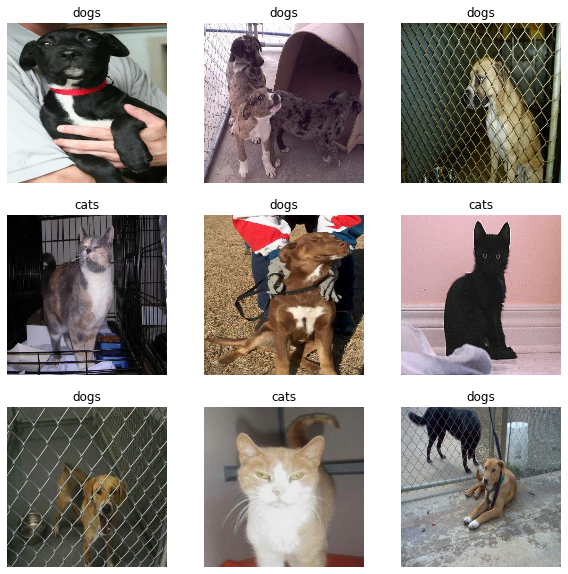

In [30]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[labels[i]])
        plt.axis("off")

In [38]:
# Number of batches in validations set
val_batches = tf.data.experimental.cardinality(validation)
test = validation.take(val_batches // 5)
validation = validation.skip(val_batches // 5)

In [39]:
tf.data.experimental.cardinality(validation)

<tf.Tensor: shape=(), dtype=int64, numpy=26>

In [40]:
tf.data.experimental.cardinality(test)

<tf.Tensor: shape=(), dtype=int64, numpy=6>

In [77]:
model = Sequential([
    Rescaling(1. / 255, input_shape = (IMG_SIZE[0], IMG_SIZE[1], 3)),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(8, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(len(classes))
])

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 160, 160, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 80, 80, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 80, 80, 16)        4624      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 40, 40, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 40, 40, 8)        

In [79]:
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [81]:
tf.random.set_seed(7)
n_epochs = 30
callbacks = [EarlyStopping(patience=5),
             ModelCheckpoint('models')]

history = model.fit(train, 
         batch_size=BATCH_SIZE,
         epochs=n_epochs,
         validation_data=validation,
         callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 20s 310ms/step - loss: 0.3138 - accuracy: 0.8700 - val_loss: 0.7147 - val_accuracy: 0.7110
Epoch 2/30
63/63 [==============================] - 20s 310ms/step - loss: 0.2980 - accuracy: 0.8725 - val_loss: 0.6706 - val_accuracy: 0.7130
Epoch 3/30
63/63 [==============================] - 20s 313ms/step - loss: 0.2454 - accuracy: 0.9040 - val_loss: 0.7423 - val_accuracy: 0.7080
Epoch 4/30
63/63 [==============================] - 19s 307ms/step - loss: 0.2220 - accuracy: 0.9120 - val_loss: 0.8508 - val_accuracy: 0.6920
Epoch 5/30
63/63 [==============================] - 21s 328ms/step - loss: 0.1610 - accuracy: 0.9410 - val_loss: 0.9167 - val_accuracy: 0.7200
Epoch 6/30
63/63 [==============================] - 20s 315ms/step - loss: 0.1354 - accuracy: 0.9550 - val_loss: 0.9426 - val_accuracy: 0.6970
Epoch 7/30
63/63 [==============================] - 21s 326ms/step - loss: 0.1118 - accuracy: 0.9605 - val_loss: 1.0837 - val_accuracy: 0.7070